# Chapter 4 - Inferences with Gaussians

In [1]:
import pyjags
import os


# this import assumes pjbcmassistant.py is two folders
# above this notebook. You may need to redirect it if
# you get a ModuleNotFoundError.
nb_path = os.getcwd()
parent_path = os.path.split(nb_path)[0]
os.chdir(os.path.split(parent_path)[0])
from pjbcmassistant import ModelHandler, SampleHandler
os.chdir(nb_path)

## 4.1 - Inferring a mean and standard deviation

In [2]:
spec_string = """
model:
Gaussian.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [1.1, 1.9, 2.3, 1.8]
n = len(x) 

sample:
mu
lambda
sigma

"""

model_spec = ModelHandler(spec_string)

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [3]:
sample_handler.summarize()

,mean,std dev,median,mode,HPD,95CI
lambda,2.698169,2.608711,1.930157,0.149185,"[0.014, 7.804]","[0.036, 9.35]"
mu,1.788866,0.769975,1.773091,1.813836,"[0.611, 3.346]","[0.488, 3.245]"
sigma,1.058733,1.103463,0.719786,0.480641,"[0.24, 3.046]","[0.327, 5.291]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0147584933929332.


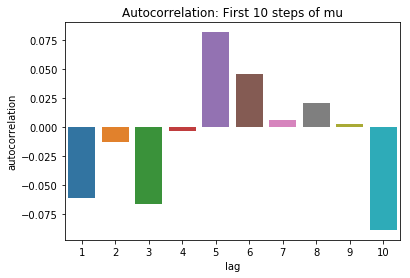

In [4]:
sample_handler.diagnostic()
sample_handler.autocorr('mu')

/home/isaiah/anaconda3/envs/pyjagsBCM/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


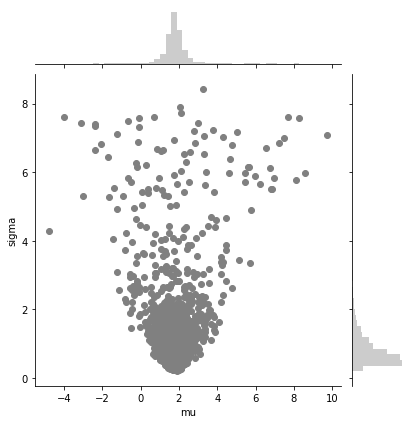

In [5]:
sample_handler.vizjoint('mu','sigma')

## 4.2 - The Seven Scientists

In [6]:
spec_string = """
model:
SevenScientists.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
n = len(x)

sample:
mu
sigma

"""

model_spec = ModelHandler(spec_string)

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [7]:
sample_handler.summarize()

,mean,std dev,median,mode,HPD,95CI
mu,9.895488,0.306478,9.928972,9.914497,"[9.591, 10.118]","[9.569, 10.106]"
sigma_0,422.463059,5612.660455,54.865811,1306.855835,"[9.806, 800.026]","[16.49, 1622.102]"
sigma_1,39.653435,212.070526,9.420618,23.004521,"[1.84, 109.312]","[2.83, 215.131]"
sigma_2,87.463940,3587.407637,2.566623,969.796564,"[0.484, 28.203]","[0.73, 58.288]"
sigma_3,2.352964,88.845464,0.144565,24.315277,"[0.015, 2.017]","[0.028, 3.794]"
sigma_4,2.803483,36.785989,0.456541,7.877853,"[0.019, 5.556]","[0.061, 10.749]"
sigma_5,1.403541,27.208746,0.132214,6.885578,"[0.015, 1.956]","[0.027, 4.242]"
sigma_6,1.586267,27.027979,0.208749,6.980280,"[0.017, 2.688]","[0.033, 5.233]"


all PSRF values < 1.05 | maximum PSRF: mu at 1.0018453578741027.


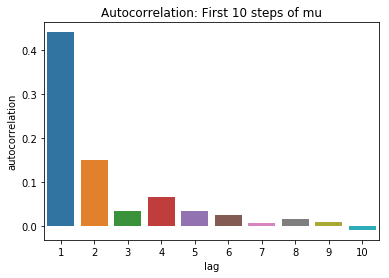

In [8]:
sample_handler.diagnostic()
sample_handler.autocorr('mu')

## 4.3 - Repeated measurement of IQ

In [9]:
spec_string = """
model:
IQ.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [[90,95,100],[105,110,115],[150,155,160]]
n, m = np.shape(x)

# this is an ugly way to do this, because we're "calling" a
# module (numpy) that we haven't actually imported... I'm sure there's
# a smart alternative, but I won't dwell on it just yet.

sample:
mu
sigma

"""

model_spec = ModelHandler(spec_string)

# model_spec.data['x'] = [[90,95,100],[105,110,115],[150,155,160]]

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [10]:
sample_handler.summarize()

,mean,std dev,median,mode,HPD,95CI
mu_0,94.987951,3.897123,94.923169,94.928551,"[87.795, 103.101]","[87.138, 102.552]"
mu_1,109.841827,3.883086,109.814846,110.698104,"[102.082, 117.313]","[102.23, 117.505]"
mu_2,155.005044,3.818688,154.923369,154.346786,"[147.243, 162.552]","[147.349, 162.849]"
sigma,6.344016,2.513580,5.759498,4.800836,"[2.859, 11.048]","[3.477, 12.993]"


all PSRF values < 1.05 | maximum PSRF: sigma at 1.0078569595036952.


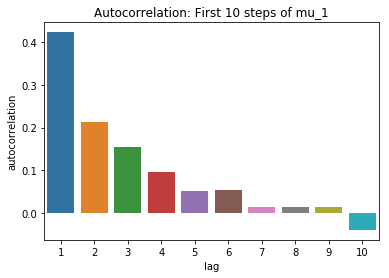

In [11]:
sample_handler.diagnostic()
sample_handler.autocorr('mu_1')